In [40]:
#import modules
import numpy as np
import matplotlib.pyplot as plt
import statistics as stats

In [41]:
#load in data from txt file
lightcurve_data = np.loadtxt("student_043.txt")
lightcurve_sec = lightcurve_data[:,0]
lightcurve_brightness = lightcurve_data[:,1]
Mstar = 0.505 #in Solar Masses
Rstar = 0.490 #in Solar Radii
Mplanet = 0.102 #In Earth Masses
G = 6.67e-11 # in m^3 / (kgs^2)

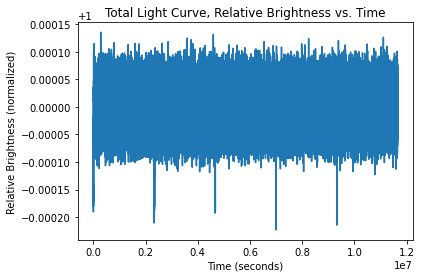

In [42]:
#project part 1, clear and labeled light curve plot:
plt.plot(lightcurve_sec,lightcurve_brightness)
plt.xlabel('Time (seconds)')
plt.ylabel('Relative Brightness (normalized)')
plt.title('Total Light Curve, Relative Brightness vs. Time')
#plt.savefig('full_curve_GR.png', dpi=300,bbox_inches='tight')
plt.show()

The first transit begins at t = 0 s, and ends at t = 12236.965194 s.
The average depth value of this transit is 0.00011205685593529413 . This is subtracted from 1 to calculate depth.
The standard deviation of this transit is 3.130622772984493e-05 .


Text(0.5, 1.0, 'First Transit, Relative Brightness vs. Time')

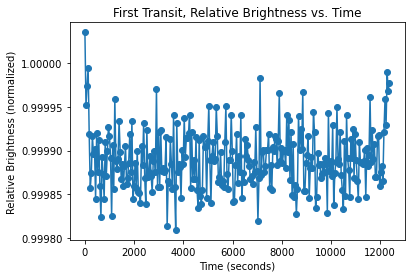

In [43]:
#project part 2:
#--------------Identifying starting variables and lists-------------
transit_start_time = [0] # first transit begins at t = 0 seconds
transit_start_indice = [0]
transit_end_time= []
transit_end_indice = []
transit_mean_average = []
transit_std = []
#--------------Finding first transit----------------
for n in range(len(lightcurve_brightness)): #calculate end transit time by matching beginning transit brightness with error
    if n>5: #removing first value
        if lightcurve_brightness[n] >= 0.99999:
            transit_end_time.append(lightcurve_sec[n-4])
            transit_end_indice.append(n-4)
            break
#--------------Calculating variables, mean, std-------------------
transit_mean = stats.mean(lightcurve_brightness[4:transit_end_indice[0]])
transit_std.append(stats.stdev(lightcurve_brightness[4:transit_end_indice[0]]))
print('The first transit begins at t =',transit_start_time[0],'s, and ends at t =',transit_end_time[0],'s.')
print('The average depth value of this transit is',1-transit_mean,'. This is subtracted from 1 to calculate depth.')#calculating mean
print('The standard deviation of this transit is',transit_std[0],'.')#calculating standard deviation
#--------------Plot of first transit--------------------
plt.plot(lightcurve_sec[0:transit_end_indice[0]+4],lightcurve_brightness[0:transit_end_indice[0]+4], marker = 'o')
plt.xlabel('Time (seconds)')
plt.ylabel('Relative Brightness (normalized)')
plt.title('First Transit, Relative Brightness vs. Time')
#plt.savefig('First_Transit_GR.png',dpi=300,bbox_inches='tight')

Text(0.5, 1.0, 'All Transits, Relative Brightness vs. Time')

<Figure size 1440x360 with 0 Axes>

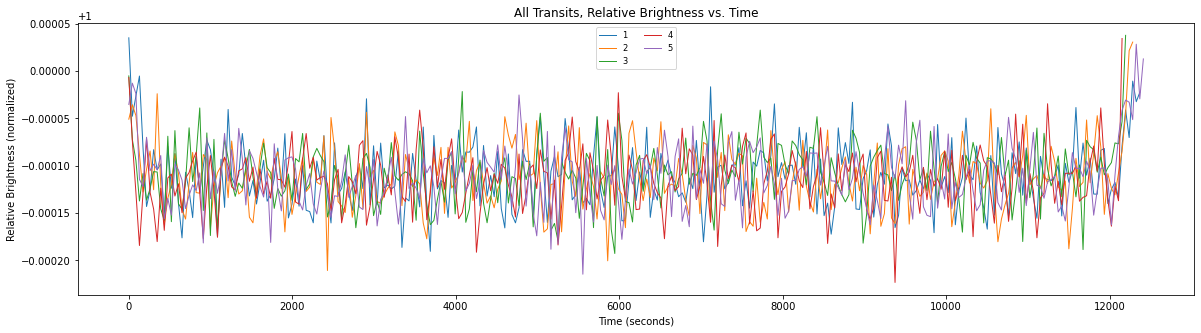

In [44]:
#Project Part 3
#------------------------for loop evaluating all transits------------------
k=-1
i=0
while i != 1:
    k +=1
    for n in range(len(lightcurve_brightness)):
        if n == len(lightcurve_brightness)-1: #stop loop when reaching end of data
            i=1
        if n > transit_end_indice[k]: #begin test only after previous transit ends
            if lightcurve_brightness[n] <= transit_mean*1.00001 and lightcurve_brightness[n] >= transit_mean*.99999:
                if lightcurve_brightness[n+2] <= transit_mean*1.00001 and lightcurve_brightness[n+2] >= transit_mean*.99999: #ensuring transit occurs within error
                    transit_start_time.append(lightcurve_sec[n])
                    transit_start_indice.append(n)
                    break
                    
    for n in range(len(lightcurve_brightness)): #calculate end transit time by matching beginning transit brightness with error
        if n == len(lightcurve_brightness)-1: #stop loop when reaching end of data
            i=1
        if n>transit_start_indice[k]+10: #begin test after previous transit begins
            if lightcurve_brightness[n] <= 1.00001 and lightcurve_brightness[n] >= .99999: #test if transit ends within error
                transit_end_time.append(lightcurve_sec[n])
                transit_end_indice.append(n)
                break
#-----------------------------plotting------------------
plt.figure(figsize=(20,5))
plt.figure(figsize=(20,5))
plt.plot(lightcurve_sec[0:transit_end_indice[0]+4],lightcurve_brightness[0:transit_end_indice[0]+4], label = '1', linewidth = 1)
plt.plot(lightcurve_sec[transit_start_indice[2]-12:transit_end_indice[2]]-lightcurve_sec[transit_start_indice[2]-12],lightcurve_brightness[transit_start_indice[2]-12:transit_end_indice[2]], label = '2', linewidth = 1)
plt.plot(lightcurve_sec[transit_start_indice[4]-16:transit_end_indice[4]]-lightcurve_sec[transit_start_indice[4]-16],lightcurve_brightness[transit_start_indice[4]-16:transit_end_indice[4]], label = '3', linewidth = 1)
plt.plot(lightcurve_sec[transit_start_indice[6]-12:transit_end_indice[6]]-lightcurve_sec[transit_start_indice[6]-12],lightcurve_brightness[transit_start_indice[6]-12:transit_end_indice[6]], label = '4', linewidth = 1)
plt.plot(lightcurve_sec[transit_start_indice[8]-6:transit_end_indice[8]]-lightcurve_sec[transit_start_indice[8]-6],lightcurve_brightness[transit_start_indice[8]-6:transit_end_indice[8]], label = '5', linewidth = 1)
plt.xlabel('Time (seconds)')
plt.ylabel('Relative Brightness (normalized)')
plt.legend(loc=9,ncol=2,fontsize='small')
plt.title('All Transits, Relative Brightness vs. Time')
plt.savefig('All_Transits_GR.png',dpi=300,bbox_inches='tight')
plt.xlabel('Time (seconds)')
plt.ylabel('Relative Brightness (normalized)')
plt.legend(loc=9,ncol=2,fontsize='small')
plt.title('All Transits, Relative Brightness vs. Time')
#plt.savefig('All_Transits_GR.png',dpi=300,bbox_inches='tight')

In [115]:
#Project Part 3 Continued
#EOM = std / (n)**(1/2)
start1 = lightcurve_sec[0]
start2 = lightcurve_sec[transit_start_indice[2]]
start3 = lightcurve_sec[transit_start_indice[4]]
start4 = lightcurve_sec[transit_start_indice[6]]
start5 = lightcurve_sec[transit_start_indice[8]]
period1 = start2 - start1
period2 = start3 - start2
period3 = start4 - start3
period4 = start5 - start4
orbital_period = stats.mean([period1,period2,period3,period4])
period_std = stats.stdev([period1,period2,period3,period4])
period_eom = period_std/(np.sqrt(4)) #s
print('The orbital period of this planet is',(orbital_period/3600/24),'days with an eom of',period_eom, 'seconds')

transit_mean1 = stats.mean(lightcurve_brightness[transit_start_indice[0]:transit_end_indice[0]])
transit_mean2 = stats.mean(lightcurve_brightness[transit_start_indice[2]:transit_end_indice[2]-4])
transit_mean3 = stats.mean(lightcurve_brightness[transit_start_indice[4]:transit_end_indice[4]-3])
transit_mean4 = stats.mean(lightcurve_brightness[transit_start_indice[6]:transit_end_indice[6]-2])
transit_mean5 = stats.mean(lightcurve_brightness[transit_start_indice[8]:transit_end_indice[8]-8])
Flux = 1 - stats.mean([transit_mean1,transit_mean2,transit_mean3,transit_mean4,transit_mean5])

transit_std.append(stats.stdev(lightcurve_brightness[transit_start_indice[2]:transit_end_indice[2]-4]))
transit_std.append(stats.stdev(lightcurve_brightness[transit_start_indice[4]:transit_end_indice[4]-3]))
transit_std.append(stats.stdev(lightcurve_brightness[transit_start_indice[6]:transit_end_indice[6]-2]))
transit_std.append(stats.stdev(lightcurve_brightness[transit_start_indice[8]:transit_end_indice[8]-8]))
depth_std = np.sqrt((transit_std[0]**2+transit_std[1]**2+transit_std[2]**2+transit_std[3]**2+transit_std[4]**2))/5
sample_number = len(lightcurve_brightness[5:transit_end_indice[0]])
eom_depth = depth_std/(np.sqrt(sample_number)) #flux units
print('The total averaged depth of this planet is',Flux,'with an eom of',eom_depth)
Rplanet_solar = (Flux**(0.5))*Rstar #Transit Flux equation, In Solar Radii
Rplanet_Earth = Rplanet_solar*109.076 #In Earth Radii
eom_planet = (np.sqrt((2*eom_depth/Flux)**2 + (0.05)**2))*Rplanet_Earth #in earth radii
print('The radius of this planet is',Rplanet_Earth,'Earth Radii, with an error of',eom_planet,'Earth Radii')

The orbital period of this planet is 26.97766967679398 days with an eom of 199.93604497688668 seconds
The total averaged depth of this planet is 0.00011259322505052793 with an eom of 8.140068065042942e-07
The radius of this planet is 0.5671284219928624 Earth Radii, with an error of 0.029518312052464152 Earth Radii


In [121]:
#Final Report: Calculating resulting variables of star system

#semimajor axis
#P^2 = G(m1+m2)/a^3
Mstar_kg = Mstar*1.989e30 #in kg
Mplanet_kg = Mplanet*5.974e24 # in kg
semi_maj = (G*(Mstar_kg+Mplanet_kg)*(orbital_period**2)/(4*np.pi))**(1/3) # in m
P_error1 = 2*period_eom/orbital_period #%
M_error1 = np.sqrt((Mstar_kg*.05)**2 +(Mplanet_kg*.05)**2) #kg
semi_maj_error = semi_maj*(1/3)*np.sqrt((M_error1/(Mstar_kg+Mplanet_kg))**2+P_error1**2) #m
print('the semimajor axis of this system is',semi_maj/(1.496e11),'AU, with an error of',semi_maj_error/(1.496e11),'AU')

semi_maj_star = semi_maj*(Mplanet_kg/Mstar_kg) #m
semi_maj_star_error = semi_maj_star*np.sqrt(0.05**2 + 0.05**2 + (semi_maj_error/semi_maj)**2) #m
print('the semimajor axis of this star is',semi_maj_star/1.496e11,'AU, with an error of',semi_maj_star_error/1.496e11,'AU')

semi_maj_planet = semi_maj - semi_maj_star #m
semi_maj_planet_error = semi_maj_planet*np.sqrt((semi_maj_error/semi_maj)**2 + (semi_maj_star_error/semi_maj_star)**2)#m
print('the semimajor axis of this planet is',semi_maj_planet/1.496e11,'AU, with an error of',semi_maj_planet_error/1.496e11,'AU')

#orbital velocity
Vplanet = 2*np.pi*semi_maj_planet/orbital_period # in m/s
Vplanet_error = np.sqrt((semi_maj_planet_error/semi_maj_planet)**2 + (period_eom/orbital_period)**2)*Vplanet #m/s
print()
print('the velocity of this planet is',Vplanet/1e3,'km/s. with an error of',Vplanet_error/1e3,'km/s')
Vstar = (Mplanet_kg/Mstar_kg)*Vplanet #m/s
Vstar_error = np.sqrt(.05**2 + .05**2 +(Vplanet_error/Vplanet)**2)*Vstar #m/s
print('the velocity of this star is',Vstar/1e3,'km/s, with an error of',Vstar_error/1e3,'km/s')
print()

#inclination
#cosi = (Ra + Rb) / a
i_rad = np.arccos((Rplanet_solar+Rstar)*6.955e5/(semi_maj/1e3))
i_deg = i*180/np.pi #deg
radius_error = np.sqrt((.05*Rstar)**2 + (eom_planet/109.076)**2)/(Rplanet+Rstar) #%
i_error = np.sqrt(radius_error**2 + (semi_maj_error/semi_maj)**2)*i_deg #deg
print('the inclination of this system is',i_deg,'degrees, with an error of',i_error,'degrees')

#Volume & Density
print()
volume_planet = 4/3*np.pi*(Rplanet_solar*6.955e8)**3 # in m^3
volume_planet_error = 3*(eom_planet/Rplanet_Earth)*volume_planet # m^3
print('the volume of this planet is',volume_planet,'m^3, with an error of',volume_planet_error,'m^3')
density_planet = Mplanet_kg/volume_planet # kg/m^3
density_planet_error = np.sqrt(.05**2 + (volume_planet_error/volume_planet)**2)*density_planet #kg/m^3
print('the uniform density of this planet is',density_planet,'kg/m^3, with an error of',density_planet_error,'kg/m^3')


the semimajor axis of this system is 0.20528694013704474 AU, with an error of 0.0034214670659829254 AU
the semimajor axis of this star is 1.245376166924301e-07 AU, with an error of 9.047450611223626e-09 AU
the semimajor axis of this planet is 0.20528681559942805 AU, with an error of 0.015301183897172181 AU

the velocity of this planet is 82.78551306754187 km/s. with an error of 6.17047516951477 km/s
the velocity of this star is 5.022195024782891e-05 km/s, with an error of 5.159818121494989e-06 km/s

the inclination of this system is 89.35743649669429 degrees, with an error of 4.665328605562804 degrees

the volume of this planet is 1.9807818177745502e+20 m^3, with an error of 3.092915124908987e+19 m^3
the uniform density of this planet is 3076.300451326917 kg/m^3, with an error of 504.37847324914907 kg/m^3
